In [1]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 6.4 MB/s eta 0:00:00


In [1]:
import cv2

In [5]:
vidcap =cv2.VideoCapture("E:/ML/KLEOS Hackathon/mystuff/Truth.mp4")
success,image = vidcap.read()
count=0
while vidcap.isOpened():
    success,image = vidcap.read()
    cv2.imwrite("E:/ML/KLEOS Hackathon/mystuff/Frames_truth/%d.jpg"%count,image)
    count+=1
    

    

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [6]:
vidcap =cv2.VideoCapture("E:/ML/KLEOS Hackathon/mystuff/Lie.mp4")
success,image = vidcap.read()
count=0
while vidcap.isOpened():
    success,image = vidcap.read()
    cv2.imwrite("E:/ML/KLEOS Hackathon/mystuff/Frames_lie/%d.jpg"%count,image)
    count+=1

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [4]:
pip install scikit-image

     ---------------------------------------- 23.7/23.7 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 218.6/218.6 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import skimage
print(skimage.__version__)

0.20.0


In [9]:
pip install Pillow

## Truth analysis

In [12]:

import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
from PIL import Image
image = Image.open("E:/ML/KLEOS Hackathon/mystuff/Frames_truth/0.jpg")
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x1280 at 0x1496BF3C700>


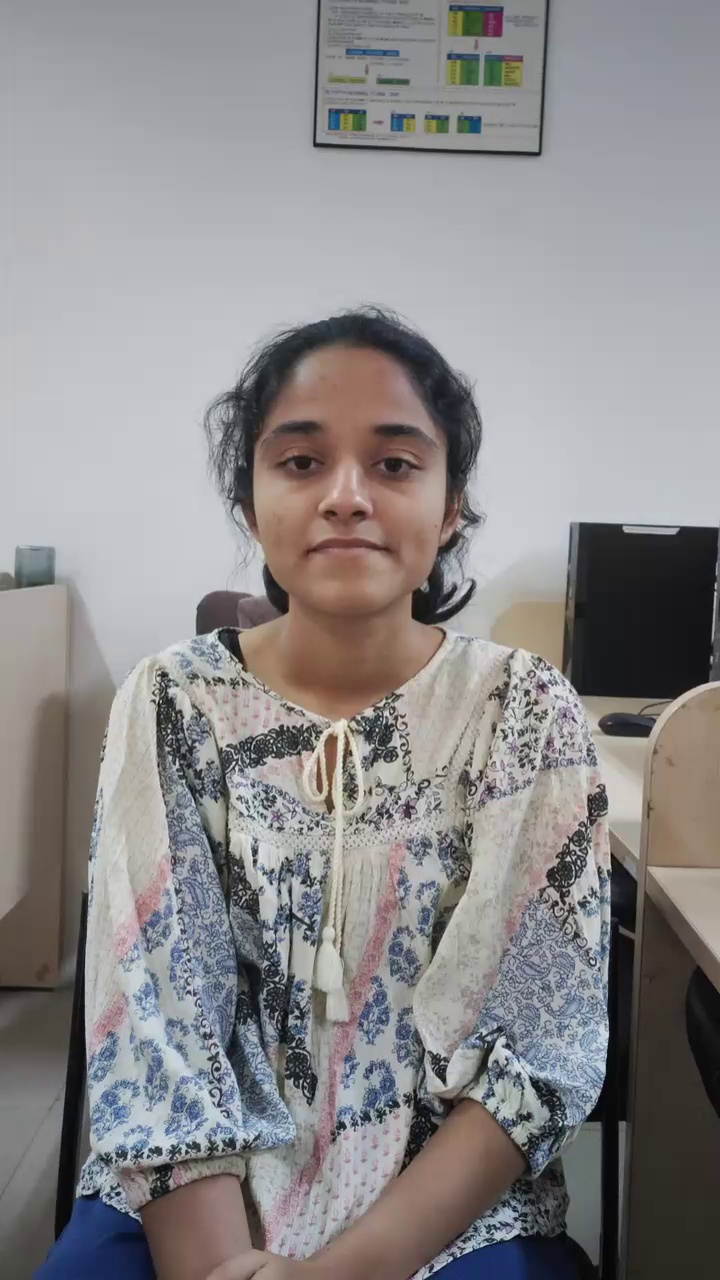

In [25]:
image

https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop

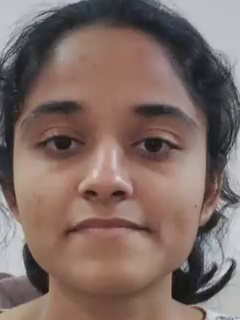

In [31]:
from IPython.display import display
width, height = image.size

left =width/3
top = height/4
right =2*width/3
bottom =  height / 2
 
# Cropped image of above dimension
# (It will not change original image)
img1 = image.crop((left, top, right, bottom))
 
# Shows the image in image viewer
img1.show()
img1

https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

* The orientations are the number of buckets we want to create. Since I want to have a 8 x 1 matrix, I will set the orientations to 8
* pixels_per_cell defines the size of the cell for which we create the histograms. In the example we covered in this article, we used 8 x 8 cells and here I will set the same value. As mentioned previously, you can choose to change this value
* We have another hyperparameter cells_per_block which is the size of the block over which we normalize the histogram. Here, we mention the cells per blocks and not the number of pixels. So, instead of writing 16 x 16, we will use 2 x 2 here

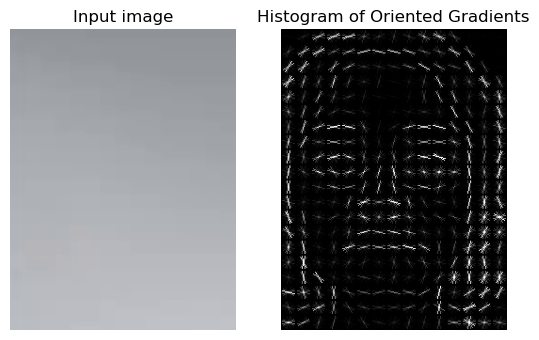

In [40]:
fd,hog_image = hog(img1,orientations=8,pixels_per_cell=(16,16),
                  cells_per_block=(1,1),visualize=True,channel_axis=-1)

fig ,(ax1,ax2)=plt.subplots(1,2,sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

#### Training SVM with HOG Features
https://www.kaggle.com/code/manikg/training-svm-classifier-with-hog-features

In [ ]:
# Hello!!